In [ ]:
# ! wget https://github.com/abhishekeb211/HMMC_AL/raw/main/HMMC_AL_11102021.csv
! wget https://github.com/abhishekeb211/HMMC_AL/raw/main/HMMC_AL_11102021.csv
# ! wget https://github.com/abhishekeb211/Credit/blob/main/test.csv
# !ls

--2025-04-26 19:45:17--  https://github.com/abhishekeb211/HMMC_AL/raw/main/HMMC_AL_11102021.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/abhishekeb211/HMMC_AL/main/HMMC_AL_11102021.csv [following]
--2025-04-26 19:45:18--  https://raw.githubusercontent.com/abhishekeb211/HMMC_AL/main/HMMC_AL_11102021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19546 (19K) [text/plain]
Saving to: ‘HMMC_AL_11102021.csv’

HMMC_AL_11102021.cs 100%[===================>]  19.09K  --.-KB/s    in 0.001s  

2025-04-26 19:45:18 (26.6 MB/s) - ‘HMMC_AL_11102021.csv’ saved [19546/19546]



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#`Import  Library`

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import re
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,Normalizer,MinMaxScaler,MaxAbsScaler,LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
!pip install skrub
from skrub import Cleaner,TableVectorizer,ToDatetime,DatetimeEncoder,TableReport
from sklearn.pipeline import make_pipeline


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 4.6 MB/s eta 0:00:00


# Encoding & Transforming
Encoding - Textual Data to Numerical    eg.["Al7075","Al7071","Al6063"] to [1,2,3]

Transforming Replace unavailable data to average or constant value . eg MAtrix Strenght to 220 as constant to unavailable data

In [ ]:

# Label Encoding Objects dtype to Float
def _Label_Encoding_(DF_):
    DF_1 = DF_.select_dtypes(include=['object'])
    for i in DF_.columns:
        if DF_[i].dtypes == 'object':
            labelencoder = preprocessing.LabelEncoder()
            DF_[i] = labelencoder.fit_transform(DF_[i])
    return DF_


def _Numeric_Encoding_(DF_):
    DF_1=DF_.columns
    _Imputer = SimpleImputer(strategy="mean") #mean, median, most_frequent, constant,
    DF_=_Imputer.fit_transform(DF_)
    # DF_= pd.DataFrame(_Imputer.fit_transform(DF_))
    # DF_=MinMaxScaler().fit_transform(DF_)
    # DF_=Normalizer().fit_transform(DF_)
    DF_=pd.DataFrame(DF_)
    DF_.columns=DF_1
    return DF_

def _Onehot_Encoding_(DF_):
    Categorical_Columns=DF_.select_dtypes(include=['object']).columns
    encoder = OneHotEncoder(sparse_output=False)
    One_Hot_Encoded = encoder.fit_transform(DF_[Categorical_Columns])
    One_Hot_Encoded = pd.DataFrame(One_Hot_Encoded,columns=encoder.get_feature_names_out(Categorical_Columns))
    DF_ = pd.concat([DF_.drop(Categorical_Columns, axis=1), One_Hot_Encoded], axis=1)
    return DF_

def _TableVector_Encoding_(DF_): ## SKRUB ONE-HOt Encoding
  Vectorizer_ = TableVectorizer()
  DF_ = Vectorizer_.fit_transform(DF_)
  return DF_

def _Date_Encoding_(DF_): ## DF Date type to YYYY,MM,DD,HR,SS
  DF_ =make_pipeline(ToDatetime(), DatetimeEncoder(resolution='hour', add_total_seconds=False, add_weekday=False, add_day_of_year=False)).fit_transform(s)
  return DF_


def _DType_Cleaner_(DF_):
  DT_Cleaner_ = Cleaner()
  DT_Cleaner_.fit_transform(DF_)
  return DF_


In [ ]:
s = pd.Series(['2024-04-14', '2024-05-15'], name='birthday')
_Date_Encoding_(s)

,birthday_year,birthday_month,birthday_day
0,2024.0,4.0,14.0
1,2024.0,5.0,15.0


In [ ]:
df_main = pd.read_csv('/content/HMMC_AL_11102021.csv',encoding= 'unicode_escape')
df_main
# df_main.head(5)
# df_main.columns
# df_main.info()
# df_main = df_main.reindex(columns=['Matrix', 'Matrix_Density', 'Matrix_Strenth', '%Matrix', 'Density_R1','Strenth_R1', 'R1', 'R1%', 'R1_Size', 'Density_R2', 'Strenth_R2', 'R2','R2%', 'R2_Size', 'Stir_Speed', 'Stir_Time', 'Mix_Temp', 'UTS'])
# df_main.isna().sum()
# _Onehot_Encoding_(df_main)

,Matrix,Matrix_Density,Matrix_Strenth,%Matrix,Density_R1,Strenth_R1,R1,R1%,R1_Size,Density_R2,...,R2%,R2_Size,Stir_Speed,Stir_Time,Mix_Temp,Mould_Preheat,UTS,Porosity,Therotical Density,Exp Density
0,AA6061,2.70,115.0,96.0,2.090,110.00,Graphite,4.0,50.00,4.50,...,0.0,50.00,500.0,8.0,720.0,NaN,91.280,0.740741,2.700,2.680
1,AA6061,2.70,115.0,94.0,2.090,110.00,Graphite,4.0,50.00,4.50,...,2.0,50.00,500.0,8.0,720.0,NaN,118.120,0.147113,2.719,2.715
2,AA6061,2.70,115.0,92.0,2.090,110.00,Graphite,4.0,50.00,4.50,...,4.0,50.00,500.0,8.0,720.0,NaN,129.930,0.907441,2.755,2.730
3,AA6061,2.70,115.0,90.0,2.090,110.00,Graphite,4.0,50.00,4.50,...,6.0,50.00,500.0,8.0,720.0,NaN,141.740,1.146542,2.791,2.759
4,AA6061,2.71,160.0,95.0,3.730,575.00,Al2O3,5.0,37.00,2.45,...,0.0,NaN,450.0,10.0,700.0,160.0,178.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,AA8011,2.70,140.0,85.0,4.200,NaN,ZrB2,7.5,0.04,2.80,...,7.5,0.05,300.0,5.0,650.0,NaN,196.600,NaN,NaN,NaN
216,AA8011,2.70,140.0,80.0,4.200,NaN,ZrB2,10.0,0.04,2.80,...,10.0,0.05,300.0,5.0,650.0,NaN,199.300,NaN,NaN,NaN
217,Al-Mg-Si-T6,2.70,310.0,93.0,3.177,137.86,SiC,5.0,6.00,NaN,...,2.0,28.00,300.0,10.0,850.0,500.0,96.080,1.843000,2.126,2.087
218,Al-Mg-Si-T6,2.70,310.0,92.0,3.177,137.86,SiC,5.0,6.00,NaN,...,3.0,28.00,300.0,10.0,850.0,500.0,117.857,2.600000,2.202,2.145


In [ ]:

imp_mean = IterativeImputer(random_state=0,max_iter=10)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
imp_mean.transform(X)

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

In [ ]:
df_main=_Numeric_Encoding_(df_main.iloc[:,:])
df_main

,Matrix,Matrix_Density,Matrix_Strenth,%Matrix,Density_R1,Strenth_R1,R1,R1%,R1_Size,Density_R2,...,R2%,R2_Size,Stir_Speed,Stir_Time,Mix_Temp,Mould_Preheat,UTS,Porosity,Therotical Density,Exp Density
0,0.0,2.70,115.0,96.0,2.090,110.000000,5.0,4.0,50.00,4.500000,...,0.0,50.000000,500.0,8.0,720.0,284.366197,91.280,0.740741,2.700000,2.680000
1,0.0,2.70,115.0,94.0,2.090,110.000000,5.0,4.0,50.00,4.500000,...,2.0,50.000000,500.0,8.0,720.0,284.366197,118.120,0.147113,2.719000,2.715000
2,0.0,2.70,115.0,92.0,2.090,110.000000,5.0,4.0,50.00,4.500000,...,4.0,50.000000,500.0,8.0,720.0,284.366197,129.930,0.907441,2.755000,2.730000
3,0.0,2.70,115.0,90.0,2.090,110.000000,5.0,4.0,50.00,4.500000,...,6.0,50.000000,500.0,8.0,720.0,284.366197,141.740,1.146542,2.791000,2.759000
4,0.0,2.71,160.0,95.0,3.730,575.000000,0.0,5.0,37.00,2.450000,...,0.0,62.656098,450.0,10.0,700.0,160.000000,178.000,2.700602,2.711472,2.692481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,11.0,2.70,140.0,85.0,4.200,185.800492,10.0,7.5,0.04,2.800000,...,7.5,0.050000,300.0,5.0,650.0,284.366197,196.600,2.700602,2.711472,2.692481
216,11.0,2.70,140.0,80.0,4.200,185.800492,10.0,10.0,0.04,2.800000,...,10.0,0.050000,300.0,5.0,650.0,284.366197,199.300,2.700602,2.711472,2.692481
217,12.0,2.70,310.0,93.0,3.177,137.860000,7.0,5.0,6.00,3.042889,...,2.0,28.000000,300.0,10.0,850.0,500.000000,96.080,1.843000,2.126000,2.087000
218,12.0,2.70,310.0,92.0,3.177,137.860000,7.0,5.0,6.00,3.042889,...,3.0,28.000000,300.0,10.0,850.0,500.000000,117.857,2.600000,2.202000,2.145000


Swap R1 and R2

In [ ]:
train_df=df_main
train_df1=train_df.copy()
train_df1.Density_R1,train_df1.Strenth_R1,train_df1.R1,train_df1["R1%"],train_df1.R1_Size,train_df1.Density_R2,train_df1.Strenth_R2,train_df1.R2,train_df1["R2%"],train_df1.R2_Size=train_df.Density_R2,train_df.Strenth_R2,train_df.R2,train_df["R2%"],train_df.R2_Size,train_df.Density_R1,train_df.Strenth_R1,train_df.R1,train_df["R1%"],train_df.R1_Size
train_df2=pd.concat([train_df,train_df1], axis=0)
df_main=train_df2

# Correlation Matrix
Checking Dependency in dataset


In [ ]:
df_main=_Label_Encoding_(df_main)
df_main=_Numeric_Encoding_(df_main)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Matrix              440 non-null    float64
 1   Matrix_Density      440 non-null    float64
 2   Matrix_Strenth      440 non-null    float64
 3   %Matrix             440 non-null    float64
 4   Density_R1          440 non-null    float64
 5   Strenth_R1          440 non-null    float64
 6   R1                  440 non-null    float64
 7   R1%                 440 non-null    float64
 8   R1_Size             440 non-null    float64
 9   Density_R2          440 non-null    float64
 10  Strenth_R2          440 non-null    float64
 11  R2                  440 non-null    float64
 12  R2%                 440 non-null    float64
 13  R2_Size             440 non-null    float64
 14  Stir_Speed          440 non-null    float64
 15  Stir_Time           440 non-null    float64
 16  Mix_Temp

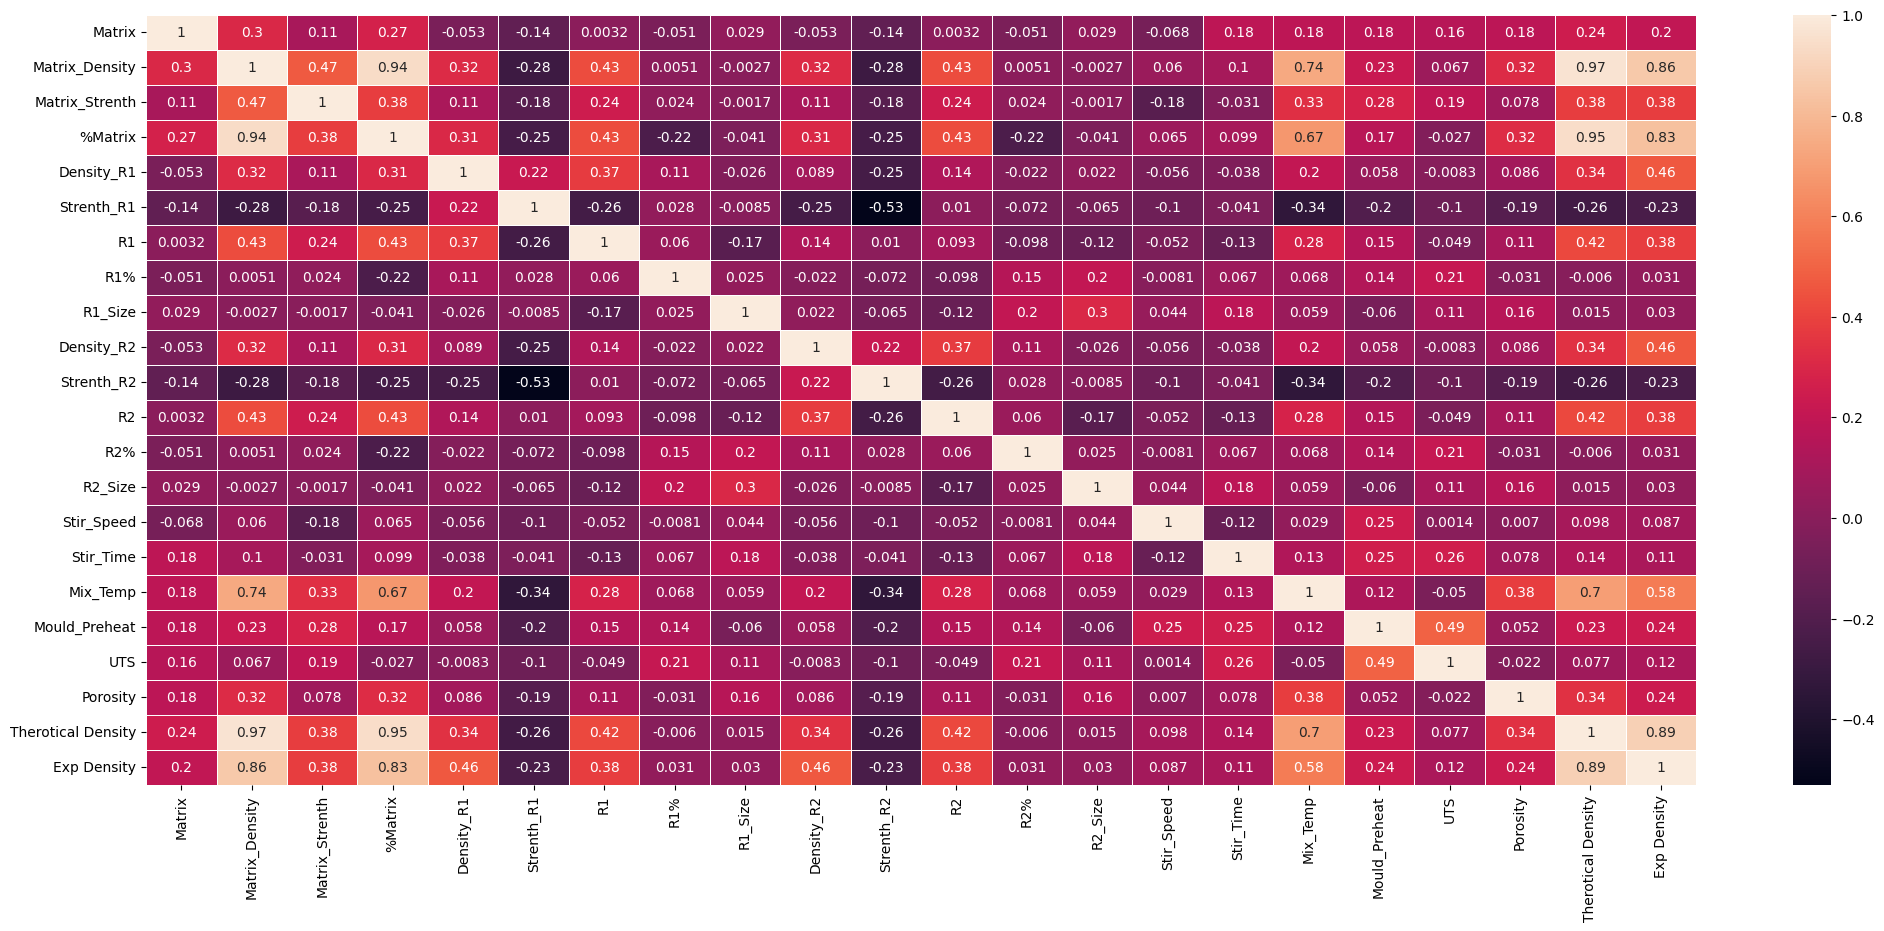

In [ ]:
corr = df_main.iloc[:,:].corr()
f, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(corr,linewidths=.5,annot=True)

In [ ]:
dfc1=df_main.dropna()
dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Matrix              440 non-null    float64
 1   Matrix_Density      440 non-null    float64
 2   Matrix_Strenth      440 non-null    float64
 3   %Matrix             440 non-null    float64
 4   Density_R1          440 non-null    float64
 5   Strenth_R1          440 non-null    float64
 6   R1                  440 non-null    float64
 7   R1%                 440 non-null    float64
 8   R1_Size             440 non-null    float64
 9   Density_R2          440 non-null    float64
 10  Strenth_R2          440 non-null    float64
 11  R2                  440 non-null    float64
 12  R2%                 440 non-null    float64
 13  R2_Size             440 non-null    float64
 14  Stir_Speed          440 non-null    float64
 15  Stir_Time           440 non-null    float64
 16  Mix_Temp

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


Dataset have 27 entries after removing unavailable one entries (Total Pure Data)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,f1_score,accuracy_score,r2_score,mean_absolute_error,mean_gamma_deviance,max_error,mean_poisson_deviance,max_error,mean_squared_log_error
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor
import catboost as cb

In [ ]:
a=sorted(dfc1.Matrix.unique())
print(a)
a1=pd.DataFrame()
a1["Matrix"]=a
a1["Map"]=[i for i in range (len(a)) ]
a1


[np.float64(0.0), np.float64(0.000907559767239868), np.float64(0.0009098671920692174), np.float64(0.000910462023056895), np.float64(0.0009107915614237569), np.float64(0.0019403105576608615), np.float64(0.0019411909748075133), np.float64(0.001942001295540249), np.float64(0.0019427458652378517), np.float64(0.0019638025398148774), np.float64(0.001963939519966691), np.float64(0.0019640118808860497), np.float64(0.0019644646942666238), np.float64(0.003152139012328387), np.float64(0.0031693942276867205), np.float64(0.0031734034239773437), np.float64(0.003177992772666845), np.float64(0.0031796805481253136), np.float64(0.003686004945354189), np.float64(0.0036910876868456893), np.float64(0.003693307975638091), np.float64(0.0036943445260740277), np.float64(0.0036947482497004026), np.float64(0.0039913005664986975), np.float64(0.003992813624182944), np.float64(0.003999866819055601), np.float64(0.004002221363920291), np.float64(0.0040042362210139385), np.float64(0.004005767840467345), np.float64(0.0

,Matrix,Map
0,0.000000,0
1,0.000908,1
2,0.000910,2
3,0.000910,3
4,0.000911,4
...,...,...
191,0.012855,191
192,0.012858,192
193,0.012914,193
194,0.012917,194


In [ ]:
a=sorted(dfc1.R1.unique())
print(a)
a1=pd.DataFrame()
a1["R1"]=a
a1["Map"]=[i for i in range (len(a)) ]
a1


[np.float64(0.0), np.float64(0.0007788931888761428), np.float64(0.0007812673340833167), np.float64(0.0007832121440152992), np.float64(0.0008364260153923215), np.float64(0.0008371561221699507), np.float64(0.000837417918580032), np.float64(0.0008388980552740141), np.float64(0.0008392889849950715), np.float64(0.000840663289126735), np.float64(0.0008423490196724569), np.float64(0.0008821343934995479), np.float64(0.000885513482378708), np.float64(0.0008885931053908767), np.float64(0.0008913612573263978), np.float64(0.0008916951631460742), np.float64(0.0009215012363385473), np.float64(0.0009227719217114223), np.float64(0.0009233269939095227), np.float64(0.0009235861315185069), np.float64(0.0009236870624251006), np.float64(0.0009508958110843128), np.float64(0.000951067432883354), np.float64(0.000951177326774093), np.float64(0.0009513959911812167), np.float64(0.0009514249274841084), np.float64(0.0010444583859279505), np.float64(0.0010538768749139282), np.float64(0.0010547854307090213), np.floa

,R1,Map
0,0.000000,0
1,0.000779,1
2,0.000781,2
3,0.000783,3
4,0.000836,4
...,...,...
402,0.026880,402
403,0.026886,403
404,0.027003,404
405,0.027009,405


In [ ]:
dfc1

,Matrix,Matrix_Density,Matrix_Strenth,%Matrix,Density_R1,Strenth_R1,R1,R1%,R1_Size,Density_R2,...,R2%,R2_Size,Stir_Speed,Stir_Time,Mix_Temp,Mould_Preheat,UTS,Porosity,Therotical Density,Exp Density
0,0.000000,0.002733,0.116396,0.097165,0.002115,0.111335,0.010121,0.004049,0.050607,0.004555,...,0.000000,0.050607,0.506068,0.008097,0.728737,0.287817,0.092388,0.000750,0.002733,0.002713
1,0.000000,0.002725,0.116084,0.094886,0.002110,0.111037,0.010094,0.004038,0.050471,0.004542,...,0.002019,0.050471,0.504714,0.008075,0.726788,0.287047,0.119234,0.000148,0.002745,0.002741
2,0.000000,0.002722,0.115932,0.092746,0.002107,0.110892,0.010081,0.004032,0.050405,0.004536,...,0.004032,0.050405,0.504054,0.008065,0.725838,0.286672,0.130983,0.000915,0.002777,0.002752
3,0.000000,0.002718,0.115764,0.090598,0.002104,0.110731,0.010066,0.004027,0.050332,0.004530,...,0.006040,0.050332,0.503322,0.008053,0.724783,0.286255,0.142682,0.001154,0.002810,0.002777
4,0.000000,0.002487,0.146826,0.087178,0.003423,0.527656,0.000000,0.004588,0.033954,0.002248,...,0.000000,0.047212,0.412948,0.009177,0.642364,0.146826,0.163344,0.002478,0.002488,0.002471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.012858,0.003156,0.163652,0.099360,0.003273,0.070136,0.019872,0.008767,0.000058,0.004910,...,0.008767,0.000047,0.350682,0.005845,0.759811,0.332407,0.229814,0.003157,0.003170,0.003147
436,0.012855,0.003155,0.163615,0.093494,0.003272,0.070121,0.019867,0.011687,0.000058,0.004908,...,0.011687,0.000047,0.350603,0.005843,0.759639,0.332332,0.232917,0.003156,0.003169,0.003147
437,0.010665,0.002400,0.275522,0.082656,0.002640,0.232221,0.023997,0.001778,0.024886,0.002824,...,0.004444,0.005333,0.266634,0.008888,0.755462,0.444390,0.085394,0.001638,0.001890,0.001855
438,0.010647,0.002395,0.275035,0.081623,0.002636,0.231811,0.023955,0.002662,0.024842,0.002819,...,0.004436,0.005323,0.266163,0.008872,0.754128,0.443605,0.104564,0.002307,0.001954,0.001903


In [ ]:
# 60% Train 40% test (Means 60% data only for training and remaining for test only)
x=dfc1.iloc[:,:]
x=_Label_Encoding_(x)
x=_Numeric_Encoding_(x)
# x_train
y=dfc1["UTS"]
# y_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [ ]:
dfc1
# x_train
# y_train

,Matrix,Matrix_Density,Matrix_Strenth,%Matrix,Density_R1,Strenth_R1,R1,R1%,R1_Size,Density_R2,...,R2%,R2_Size,Stir_Speed,Stir_Time,Mix_Temp,Mould_Preheat,UTS,Porosity,Therotical Density,Exp Density
0,0.000000,0.002733,0.116396,0.097165,0.002115,0.111335,0.010121,0.004049,0.050607,0.004555,...,0.000000,0.050607,0.506068,0.008097,0.728737,0.287817,0.092388,0.000750,0.002733,0.002713
1,0.000000,0.002725,0.116084,0.094886,0.002110,0.111037,0.010094,0.004038,0.050471,0.004542,...,0.002019,0.050471,0.504714,0.008075,0.726788,0.287047,0.119234,0.000148,0.002745,0.002741
2,0.000000,0.002722,0.115932,0.092746,0.002107,0.110892,0.010081,0.004032,0.050405,0.004536,...,0.004032,0.050405,0.504054,0.008065,0.725838,0.286672,0.130983,0.000915,0.002777,0.002752
3,0.000000,0.002718,0.115764,0.090598,0.002104,0.110731,0.010066,0.004027,0.050332,0.004530,...,0.006040,0.050332,0.503322,0.008053,0.724783,0.286255,0.142682,0.001154,0.002810,0.002777
4,0.000000,0.002487,0.146826,0.087178,0.003423,0.527656,0.000000,0.004588,0.033954,0.002248,...,0.000000,0.047212,0.412948,0.009177,0.642364,0.146826,0.163344,0.002478,0.002488,0.002471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.012858,0.003156,0.163652,0.099360,0.003273,0.070136,0.019872,0.008767,0.000058,0.004910,...,0.008767,0.000047,0.350682,0.005845,0.759811,0.332407,0.229814,0.003157,0.003170,0.003147
436,0.012855,0.003155,0.163615,0.093494,0.003272,0.070121,0.019867,0.011687,0.000058,0.004908,...,0.011687,0.000047,0.350603,0.005843,0.759639,0.332332,0.232917,0.003156,0.003169,0.003147
437,0.010665,0.002400,0.275522,0.082656,0.002640,0.232221,0.023997,0.001778,0.024886,0.002824,...,0.004444,0.005333,0.266634,0.008888,0.755462,0.444390,0.085394,0.001638,0.001890,0.001855
438,0.010647,0.002395,0.275035,0.081623,0.002636,0.231811,0.023955,0.002662,0.024842,0.002819,...,0.004436,0.005323,0.266163,0.008872,0.754128,0.443605,0.104564,0.002307,0.001954,0.001903


# Checking Accuracy with all Algorithm (Without NA)

In [ ]:
dfc4=df_main
dfc4=dfc4.sort_values(by='UTS', ascending=True)
dfc4=dfc4.dropna()
dfc4=_Label_Encoding_(dfc4)
dfc4=_Numeric_Encoding_(dfc4)

# dfc4.info()
# # # x_train
x=dfc4.drop("UTS",axis=1)
y=dfc4["UTS"]

# # y_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=60)


In [ ]:
selector=xgb.XGBRegressor(n_estimators= 30, max_depth= 2, learning_rate= 0.1, gamma= 0.07, colsample_bytree= 0.6)
selector.fit(x_train, y_train)
feature_imp = selector.feature_importances_


from collections import Counter,defaultdict
a=[]
b=[]
for index, val in enumerate(feature_imp):
    temp=(val*1000)
    a.append(x_train.columns[index])
    b.append(temp)
t=pd.DataFrame()
t["Features"]=a
t["avg"]=(b/sum(b))*100
t=t.sort_values(by = 'avg',ascending=False)
print("\n",list(t.Features))
t.reset_index(drop=True)



 ['Stir_Time', 'Mould_Preheat', 'Exp Density', 'Mix_Temp', 'Matrix_Strenth', 'Density_R2', 'R1%', 'Stir_Speed', 'Matrix', 'Density_R1', '%Matrix', 'Matrix_Density', 'R1', 'R2%', 'R2', 'Strenth_R2', 'R1_Size', 'Strenth_R1', 'R2_Size', 'Porosity', 'Therotical Density']


,Features,avg
0,Stir_Time,20.930876
1,Mould_Preheat,18.569942
2,Exp Density,13.078276
3,Mix_Temp,12.319859
4,Matrix_Strenth,10.181220
5,Density_R2,8.710976
6,R1%,8.339960
7,Stir_Speed,7.868890
8,Matrix,0.000000
9,Density_R1,0.000000


In [ ]:
# Rearranging Columns
x_train=pd.DataFrame(x_train,columns=[i for i in t.Features[:]])
x_test=pd.DataFrame(x_test,columns=[i for i in t.Features[:]])
import math

result = 1 + math.log2(x_train.shape[0])
print(result)

9.044394119358454


In [ ]:
x_train.shape[0]

264

In [ ]:
from sklearn.model_selection import KFold,ShuffleSplit
from catboost import CatBoostRegressor
from datetime import datetime
import lightgbm as lgbm


n_split=2
X_=x_train.iloc[:,:]
y=y_train[:]
_DF_acc_=[]


# GroupKFold
cvs=[ShuffleSplit,KFold]
import time
# cvs =[StratifiedShuffleSplit]

def convert_time(sec):
    sec = sec % (24 * 3600)
    hour = sec // 3600
    sec %= 3600
    min = sec // 60
    sec %= 60
    return ("%02d:%02d:%02d" % (hour, min, sec) )

def Folds(X_, Y_, clf_class, shuffle=True,  **kwargs): #True

    for cv in cvs:
        _K_Fold = cv(n_splits=n_split).split(X_,Y_)
        Y_Pred = Y_.copy()
        k=0
        last=0
        start=time.time()
        for ii, jj in (_K_Fold):
            curr=time.time()
            k+=1
            X_Train, X_Test = X_.iloc[ii], X_.iloc[jj]
            Y_train = Y_.iloc[ii]
            clf = clf_class(**kwargs)
            clf.fit(X_Train,Y_train)
            Y_Pred.iloc[jj] = clf.predict(X_Test)
            last=time.time()
            p=k*100/n_split
            e=convert_time(last-curr)
            u=convert_time(last-start)
            t=u*n_split
            # print(p,"% percent completed......",u ," ",datetime.now())

        ME=max_error(Y_,Y_Pred)
        RMSE = np.sqrt(mean_squared_error(Y_,Y_Pred))
        R2=r2_score(Y_,Y_Pred)
        _DF_acc_.append([str(clf_class)[16:-2]+str(cv)[39:-2],ME,RMSE,R2])

        print("***",str(cv)[39:-2],"***")
        print(str(clf_class)[16:-2],"")


    return clf

from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor,RandomForestRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression

Folds(X_,y,BayesianRidge,compute_score=True)
Folds(X_,y,LinearRegression)
Folds(X_, y,DecisionTreeRegressor)
Folds(X_, y,RandomForestRegressor)
Folds(X_, y,ExtraTreesRegressor)
Folds(X_, y,GradientBoostingRegressor)
Folds(X_, y,XGBRegressor,verbosity=0)
Folds(X_, y,CatBoostRegressor,verbose=0)
# print(_DF_acc_)

*** ShuffleSplit ***
linear_model._bayes.BayesianRidge 
*** KFold ***
linear_model._bayes.BayesianRidge 
*** ShuffleSplit ***
linear_model._base.LinearRegression 
*** KFold ***
linear_model._base.LinearRegression 
*** ShuffleSplit ***
tree._classes.DecisionTreeRegressor 
*** KFold ***
tree._classes.DecisionTreeRegressor 
*** ShuffleSplit ***
ensemble._forest.RandomForestRegressor 
*** KFold ***
ensemble._forest.RandomForestRegressor 
*** ShuffleSplit ***
ensemble._forest.ExtraTreesRegressor 
*** KFold ***
ensemble._forest.ExtraTreesRegressor 
*** ShuffleSplit ***
ensemble._gb.GradientBoostingRegressor 
*** KFold ***
ensemble._gb.GradientBoostingRegressor 
*** ShuffleSplit ***
sklearn.XGBRegressor 
*** KFold ***
sklearn.XGBRegressor 
*** ShuffleSplit ***
.core.CatBoostRegressor 
*** KFold ***
.core.CatBoostRegressor 


In [ ]:
ac20=pd.DataFrame(data=_DF_acc_,columns=["Model","ME","root_mean_square","R2"])
ac20

,Model,ME,root_mean_square,R2
0,linear_model._bayes.BayesianRidgeShuffleSplit,0.163678,0.030262,0.847905
1,linear_model._bayes.BayesianRidgeKFold,0.206257,0.068508,0.220521
2,linear_model._base.LinearRegressionShuffleSplit,0.173410,0.027412,0.875202
3,linear_model._base.LinearRegressionKFold,0.377344,0.082206,-0.122345
4,tree._classes.DecisionTreeRegressorShuffleSplit,0.067771,0.007960,0.989476
5,tree._classes.DecisionTreeRegressorKFold,0.209002,0.048230,0.613675
6,ensemble._forest.RandomForestRegressorShuffleS...,0.070910,0.008365,0.988378
7,ensemble._forest.RandomForestRegressorKFold,0.160100,0.043316,0.688387
8,ensemble._forest.ExtraTreesRegressorShuffleSplit,0.063922,0.007127,0.991564
9,ensemble._forest.ExtraTreesRegressorKFold,0.185645,0.038661,0.751764


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
# from torchvision import datasets, models, transforms

import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU, PReLU, ELU,Conv1D, Flatten,Dropout
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM, GRU
from keras.callbacks import EarlyStopping
from keras.layers import Activation

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




# Train /= np.max(Train) # Normalise data to [0, 1] range
# Test /= np.max(Test)


Train=np.array(dfc4.drop("UTS",axis=1))
# Test=np.array(dfc4.iloc[:,:12])
Y=np.array(dfc4["UTS"])

Train =  np.reshape(Train,( Train.shape[0],Train.shape[1], 1 ))
# Test =  np.reshape(Test,( Test.shape[0],Test.shape[1], 1 ))
# print(Train.shape)

# define dataloader parameters
batch_size = 32
num_workers=0
train_tensor = torch.utils.data.TensorDataset(torch.Tensor(Train),torch.Tensor(Y))
train_loader = torch.utils.data.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

train_x, test_x, train_y, test_y = train_test_split(Train, Y,test_size=0.3, random_state=1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# clear_session()

model = Sequential()
model.add(Conv1D(512, 2, activation="relu", input_shape=(Train.shape[1], Train.shape[2])))
# model.add(Flatten())
# model.add(Conv1D(256, 2, activation="relu"))
model.add(Conv1D(128, 2, activation="relu"))
model.add(Conv1D(32, 2, activation="relu"))
model.add(Conv1D(8, 2, activation="relu"))
model.add(Conv1D(4, 2, activation="relu"))

model.add(Conv1D(2, 2, activation="relu"))
model.add(Flatten())
model.add(Dense(1, activation="relu"))
model.compile(loss="MSE", optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           (None, 16, 512)           1536      
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 15, 128)           131200    
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 14, 32)            8224      
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 13, 8)             520       
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 12, 4)             68        
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 11, 2)             18        
_________________________________________________________________
flatten_9 (Flatten)          (None, 22)               

MSE: 735.0255
SCORE= 72.88864539389958 %



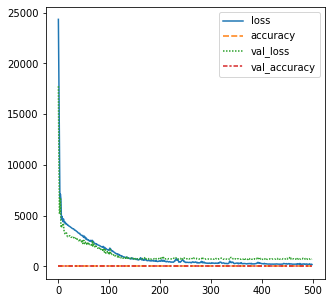

In [ ]:

history = model.fit(train_x, train_y, epochs=500, batch_size=32, validation_data=(test_x, test_y), verbose=0, shuffle=True)
ax =plt.subplots(figsize=(5,5))
ax=sns.lineplot(data=history.history)

pred_y = model.predict(test_x)

# print(model.evaluate(test_x,test_y))

print("MSE: %.4f" % mean_squared_error(test_y, pred_y))

score = max(0, 100-np.sqrt(mean_squared_error(test_y,pred_y)))
print("SCORE=",score,"%\n")

# clear_session()


MSE: 996.9851
SCORE= 68.4249288566001 %



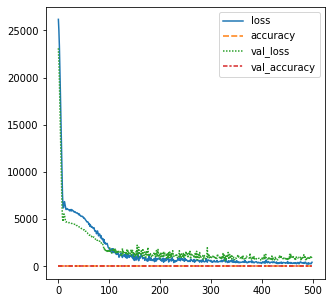

In [ ]:
from keras.layers import Bidirectional
model_lstm = Sequential()

model_lstm.add(Bidirectional(LSTM(512, dropout=0.1, recurrent_dropout=0.1), input_shape=(train_x.shape[1], train_x.shape[2])))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(8, activation='relu'))
model_lstm.add(Dense(1, activation='relu')) #1 -> number of labels
model_lstm.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# fit network
# early_stop = EarlyStopping(monitor="val_loss", verbose=1, mode='min', patience=3)
history = model_lstm.fit(train_x, train_y, epochs=500, batch_size=32, validation_data=(test_x, test_y), verbose=0, shuffle=False)

# plot history
# pyplot.plot(history.history['acc'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

ax =plt.subplots(figsize=(5,5))
ax=sns.lineplot(data=history.history)

pred_y=model_lstm.predict(test_x)

print("MSE: %.4f" % mean_squared_error(test_y, pred_y))

score = max(0, 100-np.sqrt(mean_squared_error(test_y, pred_y)))
print("SCORE=",score,"%\n")
